In [1]:

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd 
import numpy as np 
import matplotlib

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
df = pd.read_csv('../../datasets/synthesized_diabetes_data.csv')

In [4]:
df

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic
0,156.700394,31,52.154896,3.314927,4.299748,1,7,1,68.496912,146.234609,2,121.623985,85.186571,151.973658,92.697071,29.222653,34.012633,761.958003,1.667030,53.028606,0.815154,0
1,205.708528,50,74.558454,2.397619,4.750497,1,50,0,67.514518,155.252176,1,130.264602,88.848128,152.708004,92.802874,32.887620,40.640470,715.021735,1.681850,42.542497,0.855346,1
2,184.259740,39,50.107744,2.436952,5.033467,1,56,0,63.226992,134.186382,2,133.617710,94.615906,153.064309,92.212116,32.548504,36.741043,210.965098,1.565997,54.781513,0.863442,0
3,236.859522,40,46.163972,3.794523,5.382256,0,51,0,66.799333,202.246191,0,206.689504,79.333852,151.949308,92.541618,45.726840,50.127763,801.800590,1.752456,65.815471,0.851003,1
4,189.616025,92,40.045044,3.633247,4.634788,1,10,1,69.283944,186.218617,2,109.481572,67.017735,151.475941,92.036697,32.192694,41.216135,160.570897,1.779865,58.610103,0.890379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,257.604430,98,35.771984,5.118372,4.753262,0,18,0,61.331854,235.607829,1,202.049036,102.549858,152.100496,83.917625,35.150511,53.406133,88.264917,1.529035,68.481644,0.855944,1
6496,162.296900,45,35.999784,5.681376,4.227569,1,4,0,65.386967,296.862677,1,121.976799,84.701618,125.647137,82.484329,39.052591,59.843454,443.647170,1.656517,80.007193,0.830202,0
6497,187.502574,57,33.007135,4.111922,5.364477,1,20,0,66.676238,190.406558,1,114.021723,76.921248,151.736385,93.133092,49.009939,64.824856,187.248003,1.722115,115.404367,0.820453,1
6498,182.580909,32,52.969260,2.549922,4.153793,1,16,0,61.393461,132.810153,2,106.366161,66.361413,151.984054,92.246495,31.932760,46.220675,895.800788,1.542742,65.397955,0.777446,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   chol             6500 non-null   float64
 1   stab.glu         6500 non-null   int64  
 2   hdl              6500 non-null   float64
 3   ratio            6500 non-null   float64
 4   glyhb            6500 non-null   float64
 5   location         6500 non-null   int64  
 6   age              6500 non-null   int64  
 7   gender           6500 non-null   int64  
 8   height           6500 non-null   float64
 9   weight           6500 non-null   float64
 10  frame            6500 non-null   int64  
 11  bp.1s            6500 non-null   float64
 12  bp.1d            6500 non-null   float64
 13  bp.2s            6500 non-null   float64
 14  bp.2d            6500 non-null   float64
 15  waist            6500 non-null   float64
 16  hip              6500 non-null   float64
 17  time.ppn      

In [6]:
df.columns

Index(['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic'],
      dtype='object')

In [7]:
train_cols = ['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio']
important_cols = ['glyhb','stab.glu','chol','age','ratio', 'bp.1s','hdl', 'bp.1d', 'bp.2d','time.ppn']

x = df[train_cols]
y = df['diabetic']


In [8]:
x

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio
0,156.700394,31,52.154896,3.314927,4.299748,1,7,1,68.496912,146.234609,2,121.623985,85.186571,151.973658,92.697071,29.222653,34.012633,761.958003,1.667030,53.028606,0.815154
1,205.708528,50,74.558454,2.397619,4.750497,1,50,0,67.514518,155.252176,1,130.264602,88.848128,152.708004,92.802874,32.887620,40.640470,715.021735,1.681850,42.542497,0.855346
2,184.259740,39,50.107744,2.436952,5.033467,1,56,0,63.226992,134.186382,2,133.617710,94.615906,153.064309,92.212116,32.548504,36.741043,210.965098,1.565997,54.781513,0.863442
3,236.859522,40,46.163972,3.794523,5.382256,0,51,0,66.799333,202.246191,0,206.689504,79.333852,151.949308,92.541618,45.726840,50.127763,801.800590,1.752456,65.815471,0.851003
4,189.616025,92,40.045044,3.633247,4.634788,1,10,1,69.283944,186.218617,2,109.481572,67.017735,151.475941,92.036697,32.192694,41.216135,160.570897,1.779865,58.610103,0.890379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,257.604430,98,35.771984,5.118372,4.753262,0,18,0,61.331854,235.607829,1,202.049036,102.549858,152.100496,83.917625,35.150511,53.406133,88.264917,1.529035,68.481644,0.855944
6496,162.296900,45,35.999784,5.681376,4.227569,1,4,0,65.386967,296.862677,1,121.976799,84.701618,125.647137,82.484329,39.052591,59.843454,443.647170,1.656517,80.007193,0.830202
6497,187.502574,57,33.007135,4.111922,5.364477,1,20,0,66.676238,190.406558,1,114.021723,76.921248,151.736385,93.133092,49.009939,64.824856,187.248003,1.722115,115.404367,0.820453
6498,182.580909,32,52.969260,2.549922,4.153793,1,16,0,61.393461,132.810153,2,106.366161,66.361413,151.984054,92.246495,31.932760,46.220675,895.800788,1.542742,65.397955,0.777446


In [9]:
y

0       0
1       1
2       0
3       1
4       1
       ..
6495    1
6496    0
6497    1
6498    0
6499    1
Name: diabetic, Length: 6500, dtype: int64

RANDOMM FOREST TRAINING

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)


In [11]:
x_train

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio
2550,215.987842,127,29.889151,6.554891,9.832528,0,42,0,60.369422,254.020897,0,153.279870,89.115398,130.908500,85.107914,43.688492,48.831739,133.597501,1.509555,89.508485,0.977900
1697,169.808118,88,32.116434,6.423277,6.670956,1,58,1,62.263550,201.388951,0,175.937034,71.158303,151.773368,92.911414,40.288993,50.471264,130.288624,1.645463,69.116004,0.893912
676,284.149653,91,36.224982,5.327700,10.644512,0,46,1,61.969629,197.463541,1,180.932719,81.828026,151.923641,92.366777,47.705389,41.371145,47.314570,1.668729,74.453740,1.070344
1016,144.870407,24,88.266929,2.432068,3.458608,1,7,0,69.750116,145.522197,2,108.379313,62.437562,152.471649,92.635420,27.468380,38.804305,18.828681,1.712402,43.879763,0.808907
4471,169.087708,35,28.342206,3.835004,10.225937,1,43,1,69.784685,263.361334,1,151.314932,87.720073,151.642116,92.944248,47.578428,56.058084,160.454623,1.728200,75.420614,0.891799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,154.295822,25,100.027163,2.524766,3.999447,1,13,0,64.691987,139.871960,2,109.388362,64.711240,152.346265,92.870291,33.109413,44.978894,373.736798,1.643846,62.607979,0.793008
406,156.227637,87,47.839854,2.523222,7.781261,1,45,1,70.158174,192.927221,1,128.445536,69.198215,152.561443,92.339677,41.802011,46.231660,667.391313,1.652999,65.858508,0.876827
5510,187.602257,98,22.046356,3.598695,7.228946,1,15,0,65.948055,165.136452,1,129.862923,78.768958,151.861421,92.836544,37.881022,47.154249,532.786982,1.710824,64.926971,0.807972
2191,232.622323,103,49.208181,3.745909,13.565362,1,53,1,63.986653,162.053121,0,145.448211,91.414708,152.430319,92.546891,32.338770,46.918695,1135.207562,1.567735,62.397981,0.848266


In [12]:
forest_model  = RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
%%time 
forest_model.fit(x_train, y_train)

Wall time: 4.51 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
forest_model.score(x_train, y_train)

1.0

In [15]:
forest_train_probability = forest_model.predict_proba(x_train)
forest_train_probability

array([[0.01, 0.99],
       [0.04, 0.96],
       [0.01, 0.99],
       ...,
       [0.02, 0.98],
       [0.01, 0.99],
       [0.1 , 0.9 ]])

In [16]:
forest_model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [17]:
len(forest_model.estimators_)

100

In [18]:
forest_importance_df = pd.DataFrame({
    'feature' : x_train.columns, 
    'importance' : forest_model.feature_importances_
}).sort_values('importance', ascending=False)

In [19]:
forest_importance_df.head(10)

,feature,importance
4,glyhb,0.233803
1,stab.glu,0.125633
6,age,0.074011
11,bp.1s,0.047111
15,waist,0.046380
17,time.ppn,0.044662
12,bp.1d,0.044639
2,hdl,0.043055
13,bp.2s,0.039973
0,chol,0.035615


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

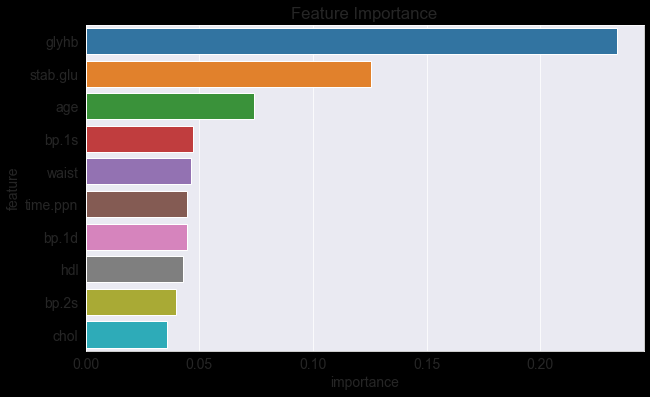

In [20]:
plt.title('Feature Importance')
sns.barplot(data=forest_importance_df.head(10), x='importance', y='feature')

In [21]:
base_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, y_train)

In [22]:
base_train_accuracy = base_forest_model.score(x_train, y_train)

In [23]:
base_accuracy = base_train_accuracy
base_accuracy

1.0

In [24]:
forest_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(x_train, y_train)

In [25]:
forest_model_1.score(x_train, y_train)

0.9947252747252747

In [26]:
forest_model_2 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(x_train, y_train)


In [27]:
forest_model_2.score(x_train, y_train)

1.0

In [28]:
def estimator_no_error(est):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=est)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'No. of Estimators' : est, 
        'Training Error' : forest_train_accuracy
        }

In [29]:
%%time
forest_error_df = pd.DataFrame([estimator_no_error(est) for est in range(1, 10)])

Wall time: 2.67 s


In [30]:
forest_error_df

,No. of Estimators,Training Error
0,1,0.080220
1,2,0.080879
2,3,0.030769
3,4,0.025934
4,5,0.016703
5,6,0.011209
6,7,0.011209
7,8,0.007473
8,9,0.007473


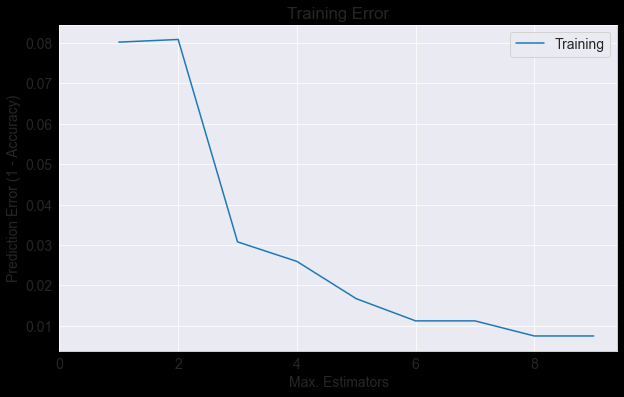

In [31]:
plt.figure()
plt.plot(forest_error_df['No. of Estimators'], forest_error_df['Training Error'])

plt.title('Training Error')

plt.xticks(range(0,10,2))

plt.xlabel('Max. Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')

plt.legend(['Training'])

In [32]:
def test_params(**params):
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return rf_model.score(x_train, y_train)

In [33]:
test_params(max_depth=5)

0.8848351648351649

In [34]:
test_params(max_depth=26)

1.0

In [35]:
def depth_max(dm):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=dm)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max depth' : dm, 
        'Training Error' : forest_train_accuracy
        }

In [115]:
%%time
max_depth_df = pd.DataFrame([depth_max(dm) for dm in range(1, 25)])

Wall time: 1min 16s


In [116]:
max_depth_df

,Max depth,Training Error
0,1,0.258462
1,2,0.165055
2,3,0.146154
3,4,0.129231
4,5,0.115165
5,6,0.103956
6,7,0.087033
7,8,0.066813
8,9,0.050110
9,10,0.035824


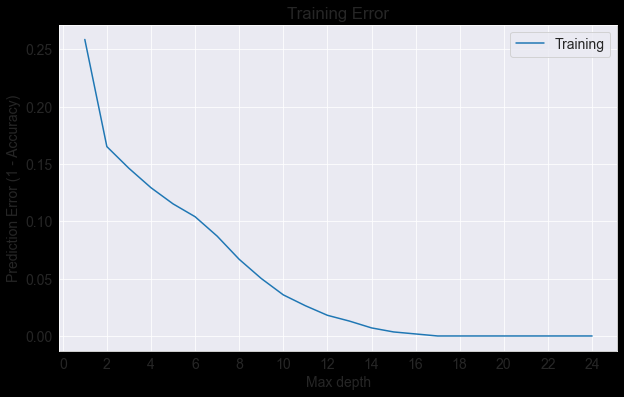

In [117]:
plt.figure()
plt.plot(max_depth_df['Max depth'], max_depth_df['Training Error'])

plt.title('Training Error')
plt.xticks(range(0,26,2))
plt.xlabel('Max depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training'])

In [39]:
test_params(max_leaf_nodes= 2**5)

0.8958241758241758

In [40]:
test_params(max_leaf_nodes= 2**20)

1.0

In [41]:
base_accuracy

1.0

In [42]:
def max_leaf(ml):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_leaf_nodes=ml)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max leaf_nodes' : ml, 
        'Training Error' : forest_train_accuracy
        }

In [204]:
%%time
max_leaf_df = pd.DataFrame([max_leaf(ml) for ml in range(2, 60)])

Wall time: 2min 22s


In [205]:
max_leaf_df

,Max leaf_nodes,Training Error
0,2,0.258462
1,3,0.172088
2,4,0.158242
3,5,0.155385
4,6,0.151868
5,7,0.148352
6,8,0.143736
7,9,0.137582
8,10,0.135604
9,11,0.132747


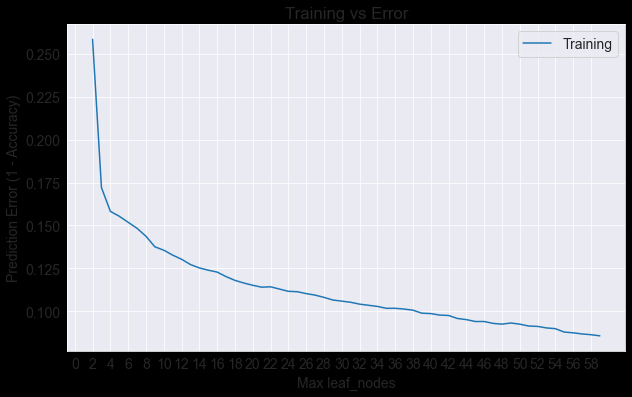

In [207]:
plt.figure()
plt.plot(max_leaf_df['Max leaf_nodes'], max_leaf_df['Training Error'])

plt.title('Training vs Error')
plt.xticks(range(0,60,2))
plt.xlabel('Max leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training'])

In [46]:
test_params(max_features='log2')

1.0

In [47]:
test_params(max_features=3)

1.0

In [48]:
def features_max(mf):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=mf)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max features' : mf, 
        'Training Error' : forest_train_accuracy
        }

In [49]:
max_leaf_df = pd.DataFrame([features_max('log2')])

In [50]:
max_leaf_df

,Max features,Training Error
0,log2,0.0


In [51]:
max_leaf_df = pd.DataFrame([features_max('sqrt')])

In [52]:
max_leaf_df

,Max features,Training Error
0,sqrt,0.0


In [53]:
max_leaf_df = pd.DataFrame([features_max('auto')])

In [54]:
max_leaf_df

,Max features,Training Error
0,auto,0.0


In [55]:
max_leaf_df = pd.DataFrame([features_max(None)])

In [56]:
max_leaf_df

,Max features,Training Error
0,None,0.0


In [57]:
test_params(min_samples_split=3, min_samples_leaf=2)

0.9854945054945055

In [58]:
test_params(min_samples_split=20, min_samples_leaf=14)

0.9105494505494506

In [59]:
test_params(min_impurity_decrease=1e-7)

1.0

In [77]:
test_params(min_impurity_decrease=1e-4)

0.983956043956044

In [75]:
test_params(bootstrap=True)

1.0

In [176]:
test_params(bootstrap=True, max_samples=0.4)

0.9578021978021978

In [208]:
final_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=10,
    max_features='auto',
    max_depth=16,
    max_leaf_nodes=60,
    min_samples_split=40, 
    min_samples_leaf=34,
    min_impurity_decrease=1e-4,
    bootstrap=True, 
    max_samples=0.4,
    class_weight={1 : 1, 0 : 1.5}
)

In [209]:
final_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, max_depth=16,
                       max_leaf_nodes=60, max_samples=0.4,
                       min_impurity_decrease=0.0001, min_samples_leaf=34,
                       min_samples_split=40, n_estimators=10, random_state=42)

In [210]:
final_rf.score(x_train, y_train)

0.8729670329670329

In [211]:
y_pred = final_rf.predict(x_test)

In [212]:
rmse = np.sqrt(mse(y_test, y_pred))

In [213]:
rmse

0.3651483716701107

In [214]:
def predict_discrete (final_rf, single_input):
    input_df = pd.DataFrame([single_input])
    #input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    #input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    #input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

    x_input = input_df
    predictions = final_rf.predict(x_input)[0]
    probability = final_rf.predict_proba(x_input)[0][list(final_rf.classes_).index(predictions)]

    return predictions, probability

In [215]:
new_input = {'chol': 203,
             'stab.glu' : 27,
             'hdl' : 56,
             'ratio': 3.6,
             'glyhb': 4.31,
             'location' : 0,
             'age': 27,
            'gender': 0,
            'height': 62,
            'weight': 121,
            'frame': 1,
            'bp.1s': 118,
            'bp.1d': 59,
            'bp.2s': 152.38,
       'bp.2d': 92.52,
       'waist': 29,
       'hip': 38, 
       'time.ppn': 720, 
       'height_meters': 1.57,
       'BMI': 49.79,
       'hip_waist_ratio': 0.76
       }

In [216]:
predict_discrete(final_rf, new_input)

(0, 0.5858698177524881)

import pickle
filename = 'diabetes_predictor.sav'
pickle.dump(final_rf, open(filename, 'wb'))